In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/faults_pr3/

/content/gdrive/MyDrive/faults_pr3


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('dataset/datax.csv')
np.save('dataset/X.npy', data)

labels = pd.read_csv('dataset/Y.csv')
np.save('dataset/Y.npy', labels)

In [3]:
import numpy as np
import pandas as pd
X = np.load('dataset/X.npy')
print(X.shape)
X = X.reshape(3999, 1024, 1)
print(X.shape)


Y = np.load('dataset/Y.npy')
print(Y.shape)
Y = Y.reshape(3999)
print(Y.shape)

(3999, 1024)
(3999, 1024, 1)
(3999, 1)
(3999,)


(3999, 1024)


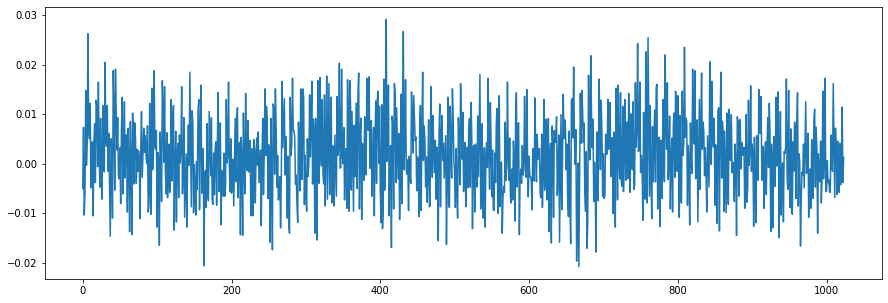

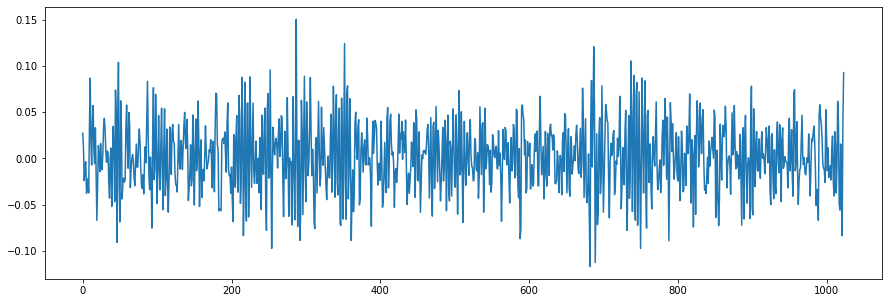

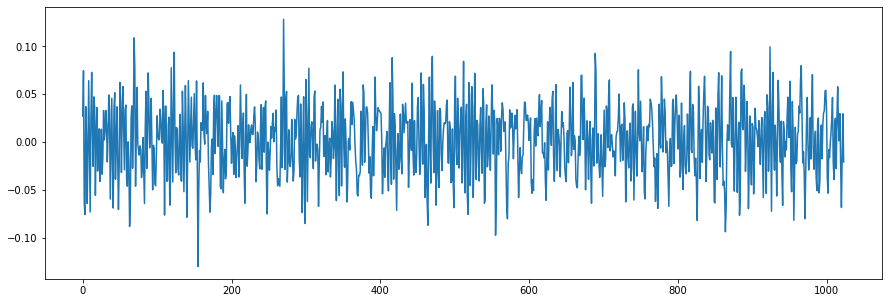

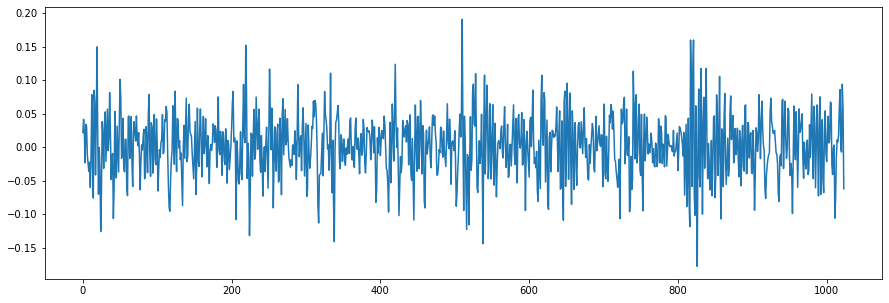

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data = X.reshape(-1, 1024)
labels = Y
print(data.shape)

# plt.subplot(2,2,1)
plt.figure(figsize=(15,5))
plt.plot(data[0])
plt.show()
# plt.subplot(2,2,2)
plt.figure(figsize=(15,5))
plt.plot(data[1000])
plt.show()
# plt.subplot(2,2,3)
plt.figure(figsize=(15,5))
plt.plot(data[2000])
plt.show()
# plt.subplot(2,2,4)
plt.figure(figsize=(15,5))
plt.plot(data[3000])
plt.show()

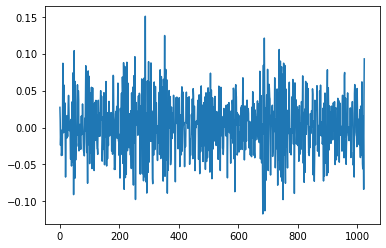

In [ ]:
plt.plot(data[1000])
plt.show()

[ 602 3659  970 ... 2259 1900 3483]
(1200, 1024) (1200,)

performing tsne with perplexity 10 and with 2000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.081s...
[t-SNE] Computed neighbors for 1200 samples in 2.745s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 0.103496
[t-SNE] Computed conditional probabilities in 0.067s
[t-SNE] Iteration 50: error = 90.8847351, gradient norm = 0.4185488 (50 iterations in 0.497s)
[t-SNE] Iteration 100: error = 94.7840576, gradient norm = 0.3814243 (50 iterations in 0.517s)
[t-SNE] Iteration 150: error = 95.3287506, gradient norm = 0.3943091 (50 iterations in 0.609s)
[t-SNE] Iteration 200: error = 95.9933014, gradient norm = 0.3708692 (50 iterations in 0.507s)
[t-SNE] Iteration 250: error = 96.4241791, gradient norm = 0.3518917 (50 iterations in 0.525s)
[t-SNE] KL divergence after 250 iterations wit

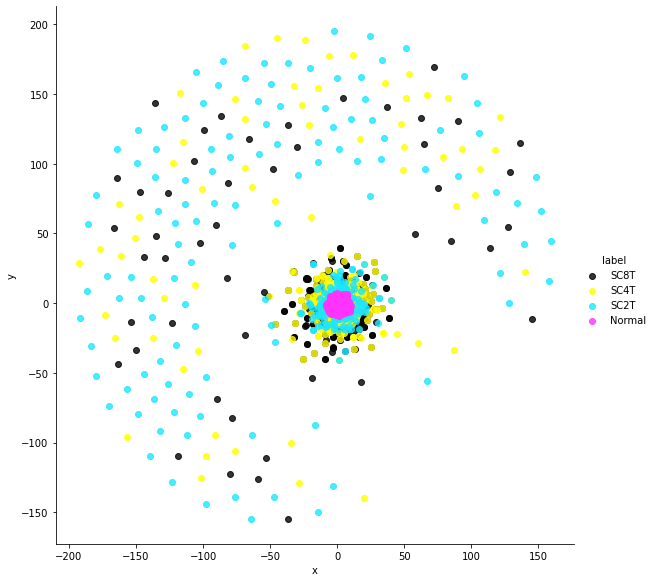

Done

performing tsne with perplexity 50 and with 2000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.110s...
[t-SNE] Computed neighbors for 1200 samples in 2.804s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 0.128661
[t-SNE] Computed conditional probabilities in 0.318s
[t-SNE] Iteration 50: error = 68.2417297, gradient norm = 0.5005596 (50 iterations in 1.021s)
[t-SNE] Iteration 100: error = 71.9583740, gradient norm = 0.4457289 (50 iterations in 1.061s)
[t-SNE] Iteration 150: error = 73.9644318, gradient norm = 0.4074989 (50 iterations in 1.094s)
[t-SNE] Iteration 200: error = 72.6350555, gradient norm = 0.3701625 (50 iterations in 0.992s)
[t-SNE] Iteration 250: error = 74.8295288, gradient norm = 0.3818769 (50 iterations in 1.017s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.829529
[t-SNE] Iteration 3

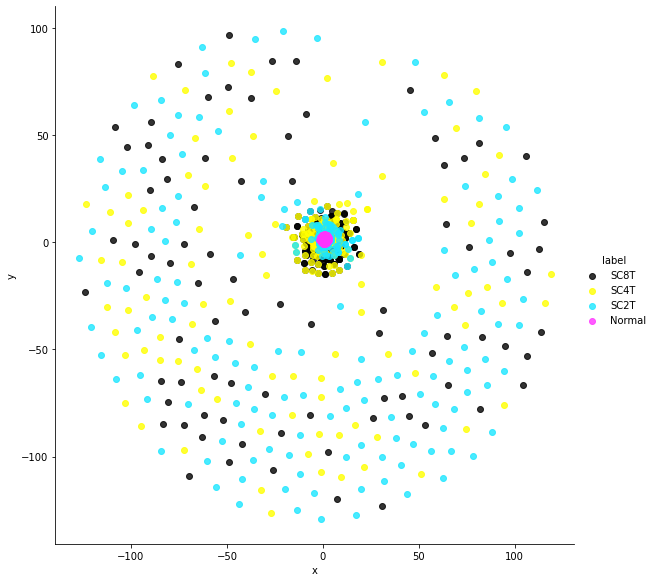

Done

performing tsne with perplexity 100 and with 2000 iterations at max
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.110s...
[t-SNE] Computed neighbors for 1200 samples in 2.823s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 0.136924
[t-SNE] Computed conditional probabilities in 0.600s
[t-SNE] Iteration 50: error = 63.3751297, gradient norm = 0.3928255 (50 iterations in 1.533s)
[t-SNE] Iteration 100: error = 66.9522247, gradient norm = 0.4130693 (50 iterations in 1.521s)
[t-SNE] Iteration 150: error = 65.9124298, gradient norm = 0.3902014 (50 iterations in 1.529s)
[t-SNE] Iteration 200: error = 68.2963104, gradient norm = 0.4277726 (50 iterations in 1.564s)
[t-SNE] Iteration 250: error = 68.8404541, gradient norm = 0.4068387 (50 iterations in 1.635s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.840454
[t-SNE] Iteration 

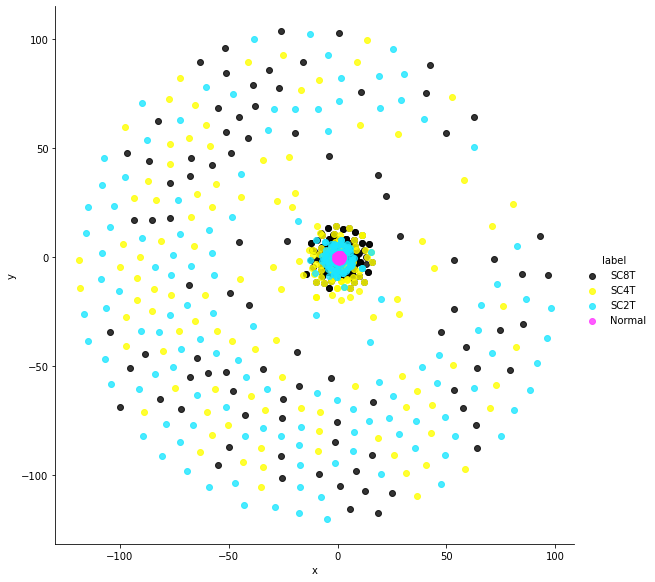

Done


In [14]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
from scipy import stats
from collections import Counter
%matplotlib inline

def perform_tsne(X_data, y_data, perplexities, n_iter=2000, image_name_prefix='tsne'):
  for index, perplexity in enumerate(perplexities):
    #perform tsne
    print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
    X_reduced = TSNE(n_components = 2, verbose = 2, perplexity= perplexity, n_iter = n_iter).fit_transform(X_data)
    print('Done')

    # prepare data for seaborn
    print('Creating plot for this t-sne visualization..')
    df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
    import itertools
    mks = itertools.cycle(['o', 'x', '^', '+', '*', '8', 's', 'p', '<', '>', '1','2','3','4'])
    markers = [next(mks) for i in df["label"].unique()]
    flatui = ["#000000", "#FFFF00", "#1CE6FF", "#FF34FF"]

    #draw
    # sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, palette=sns.color_plette(flatui), markers=markers)
    sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, palette=sns.color_palette(flatui))
    # sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8)
    # plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
    img_name = 'dataset/' + image_name_prefix + '_{}_{}.png'.format(perplexity, n_iter)
    print('saving this plot as image in present working directory...')
    plt.savefig(img_name)
    plt.show()
    print('Done')

def main():
  x = np.load('dataset/X.npy')
  x = x.reshape(3999, 1024, 1)
  x = x.reshape(-1, 1024)

  y = np.load('dataset/Y.npy')
  y = y.reshape(3999)

  shuffle_idx = np.random.permutation(y.shape[0])
  print(shuffle_idx)
  x = x[shuffle_idx]
  y = y[shuffle_idx]
  train_x = x[0: int(y.shape[0]*0.7)]
  train_y = y[0: int(y.shape[0]*0.7)]
  valid_x = x[int(y.shape[0]*0.7):]
  valid_y = y[int(y.shape[0]*0.7):]

  classes = ['Normal', 'SC2T', 'SC4T', 'SC8T']
  y_labels = np.empty((0))
  for i in valid_y:
    y_labels = np.append(y_labels, classes[i])
  y_pre_tsne = y_labels

  X_pre_tsne = valid_x
  # y_pre_tsne = valid_y
  print(X_pre_tsne.shape, y_pre_tsne.shape)

  perform_tsne(X_data = X_pre_tsne, y_data = y_pre_tsne, perplexities=[10,50, 100])

if __name__ == '__main__':
  main()